<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/DecisionTree_C45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Mengimport Beberapa Library
import pandas as pd #import library pandas
from sklearn.tree import DecisionTreeClassifier #import library Decision Tree Classifier
from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

data = pd.read_csv('Pengunjung_Mall.csv') #import data excel
print(data)

     ID_Pelanggan  Gender  Usia  Pendapatan_Tahunan_Ribuan_USD  \
0               1    Pria    19                             15   
1               2    Pria    21                             15   
2               3  Wanita    20                             16   
3               4  Wanita    23                             16   
4               5  Wanita    31                             17   
..            ...     ...   ...                            ...   
195           196  Wanita    35                            120   
196           197  Wanita    45                            126   
197           198    Pria    32                            126   
198           199    Pria    32                            137   
199           200    Pria    30                            137   

     Pengeluaran_USD  
0                 39  
1                 81  
2                  6  
3                 77  
4                 40  
..               ...  
195               79  
196               28  


In [17]:
data = data.drop(labels='ID_Pelanggan', axis=1) #menghapus kolom ID Pelanggan
feature_names=['Usia','Pendapatan_Tahunan_Ribuan_USD','Pengeluaran_USD'] #memilih kolom-kolom yang akan digunakan untuk menentukan keputusan
features = data[feature_names] #mengambil data yang akan menjadi penentu keputusan
label = data.Gender #mengambil data untuk jawaban dari keputusan

In [19]:
#membuat objek Decision Tree classifer
clf = DecisionTreeClassifier(random_state=0, max_depth=None,
                            min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0) 
clf = clf.fit(features,label) #melakukan training data dengan Decision Tree Classifer

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0) #melakukan training dan testing pada data
prediction = clf.predict(X_test) #memprediksi hasil dari dataset

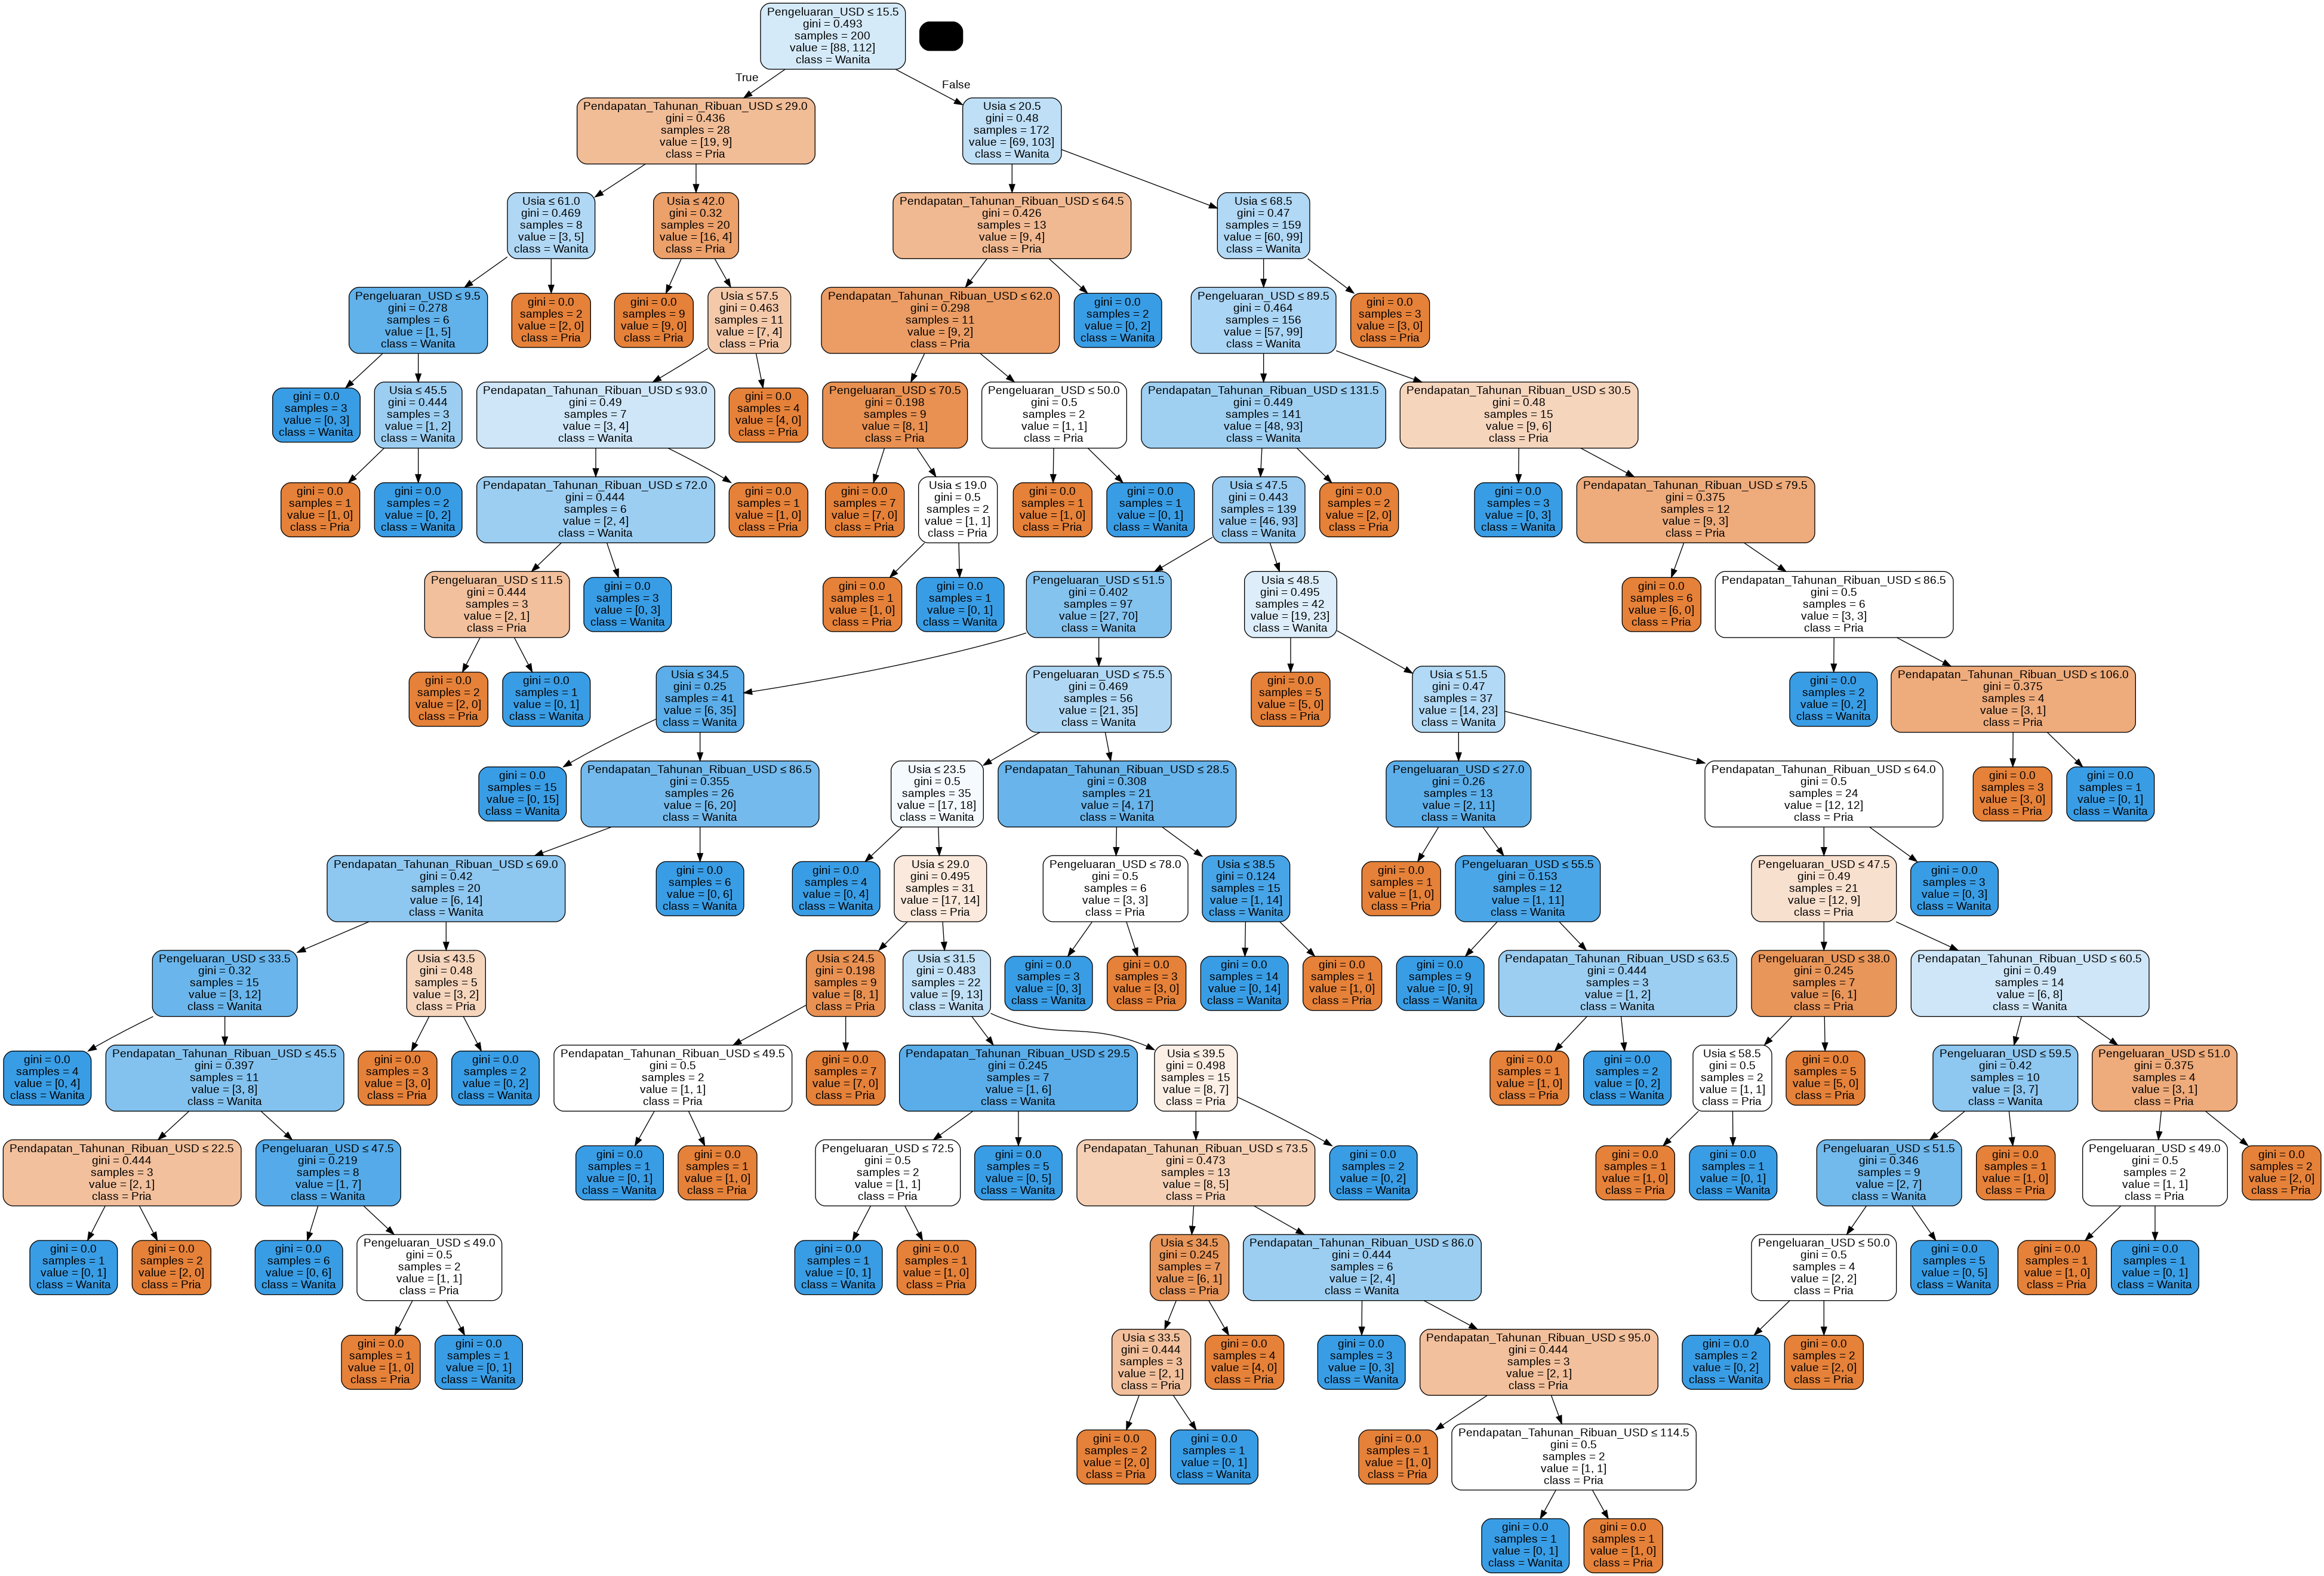

In [21]:
# from io import StringIO #import library StringIO
from IPython.display import Image #import library Image  
from sklearn.tree import export_graphviz #import library export_graphviz
import pydotplus #import library pydotplus

# dot_data = StringIO() #membuat objek StringIO
dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=feature_names,
                class_names=label.unique()) #mengatur tampilan dari diagram keputusan
graph = pydotplus.graph_from_dot_data(dot_data) #memasukkan data hasil training kedalam diagram graph
graph.write_png('pelanggan.png') #membuat nama file image dari diagram graph
Image(graph.create_png()) #membuat image gambar